In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from math import sqrt
from sklearn.pipeline import Pipeline

In [17]:
data = pd.read_csv("data.csv")
train_data,test_data = train_test_split(data, test_size = .2)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
def get_numpy_data(data, features, output):
    data = data.copy()
    #add a constant column
    data['constant'] = 1
    features = ['constant'] + features
    data_features = data[features]
    feature_matrix = data_features.values
    output_array = data[output]
    output_matrix = output_array.values
    return (feature_matrix, output_matrix)

In [19]:
(example_features, example_output) = get_numpy_data(data, ['sqft_living'], 'price') 
# the [] around 'sqft_living' makes it a list
print (example_features) # this accesses the first row of the data the ':' indicates 'all columns'
print (example_output) # and the corresponding output

[[   1 1180]
 [   1 2570]
 [   1  770]
 ...
 [   1 1020]
 [   1 1600]
 [   1 1020]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [20]:
my_weights = np.array([1., 1.]) #example_weights
my_features = example_features[0,]
predicted_value = np.dot(my_features, my_weights)
print (predicted_value)

1181.0


In [21]:
def predict_output(feature_matrix, weights):
     # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [22]:
test_predictions = predict_output(example_features, my_weights)
print (test_predictions[0])
print (test_predictions[1])

1181.0
2571.0


In [23]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

In [24]:
(example_features, example_output) = get_numpy_data(data, ['sqft_living'], 'price') 
my_weights = np.array([0.,0.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output
feature = example_features[:,0]
derivative = feature_derivative(errors, feature)
print (derivative)
print (-np.sum(example_output)*2) # should be the same as derivative

-23345850016.0
-23345850016.0


In [25]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    for i in range(1000):
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # subtract the step size times the derivative from the current weight
            weights[i]= weights[i] - (step_size * derivative)
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            derivative_square = derivative * derivative 
            gradient_sum_squares = derivative_square.sum()
        # compute the square-root of the gradient sum of squares to get the gradient magnitude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)  

[3760 1850 1460 ... 3110 3380 1380]
[-46999.82027509    282.12143176]
prediction:  [ 582130.97253932  539812.75777602 1462349.83961597 ...  652661.33047815
  393109.61326324  630091.61593773]
prediction_sum:  2300368747.8048563
output:  2302145180.0


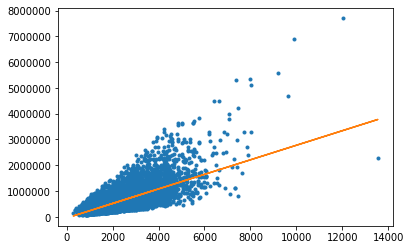

In [26]:
# let's test out the gradient descent as simple regression
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e3
print(simple_feature_matrix[:,1])

test_weight = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print (test_weight)

(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
prediction = predict_output(test_simple_feature_matrix, test_weight)
prediction_train = predict_output(simple_feature_matrix, test_weight)
print ('prediction: ',prediction)
print ('prediction_sum: ',prediction.sum())
print ('output: ',test_output.sum())
plt.plot(simple_feature_matrix[:,1], output, '.')
plt.plot(simple_feature_matrix[:,1], prediction_train)
plt.savefig('MLR.png', dpi = 300)

In [27]:
## using gradient descent for multiple regression
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9
test_weight_multiple = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)
(test_simple_feature_matrix_multiple, test_output_multiple) = get_numpy_data(test_data, model_features, my_output)
prediction_multiple = predict_output(test_simple_feature_matrix_multiple, test_weight_multiple)
print ('weights: ',test_weight_multiple)
print ('prediction_multiple: ',prediction_multiple)
print ('prediction_multiple_sum: ',prediction_multiple.sum())
print ('output_multiple: ',test_output_multiple)

weights:  [-1.00000010e+05  2.41490013e+02  6.95310707e+01]
prediction_multiple:  [ 570631.75445114  532322.32030813 1452017.76654464 ...  631699.56852988
  385192.88139036  634630.31006102]
prediction_multiple_sum:  2303451727.039073
output_multiple:  [1035000.  638700. 3345000. ...  360000.  347000.  885000.]


In [28]:
## using scikit_learn for simple regression
test_feature = test_data[simple_features].values.reshape(-1,1)
test_output = test_data['price'].values.reshape(-1,1)
train_feature = train_data[simple_features].values.reshape(-1,1)
train_output = train_data['price'].values.reshape(-1,1)
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(train_feature, train_output)
prediction = regr.predict(test_feature)
print ('prediction: ',prediction)
print ('prediction_sum: ',prediction.sum())
print ('intercept',regr.intercept_)
print ('coefficients',regr.coef_)
print ('R^2: ',regr.score(train_output , train_feature))

prediction:  [[ 582310.47299957]
 [ 540094.15566645]
 [1460409.87352851]
 ...
 [ 652671.00188811]
 [ 393744.25557829]
 [ 630155.63264378]]
prediction_sum:  2301665273.3545427
intercept [-45305.44468618]
coefficients [[281.44211555]]
R^2:  -40080072170.415855


In [29]:
## using scikit learn for multiple regression
test_feature_multiple = test_data[model_features].values.reshape(-1,2)
test_output_multiple = test_data['price'].values.reshape(-1,1)
train_feature_multiple = train_data[model_features].values.reshape(-1,2)
train_output_multiple = train_data['price'].values.reshape(-1,1)
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(train_feature_multiple, train_output_multiple)
prediction = regr.predict(test_feature_multiple)

print ('prediction: ',prediction)
print ('prediction_sum: ',prediction.sum())
print ('intercept',regr.intercept_)
print ('coefficients',regr.coef_)
# print ('R^2: ',regr.score(outputs , simple_feature))

prediction:  [[ 570207.45300484]
 [ 531851.16200248]
 [1454124.88239927]
 ...
 [ 631302.15149958]
 [ 384295.55267209]
 [ 634638.06964205]]
prediction_sum:  2301973113.942786
intercept [-102982.41283856]
coefficients [[241.5463408  70.8113294]]
